In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

In [5]:
data = pd.read_csv("../datasets/CCPP.csv")
x = data[['AT', 'V', 'AP', 'RH']]
y = data['PE']

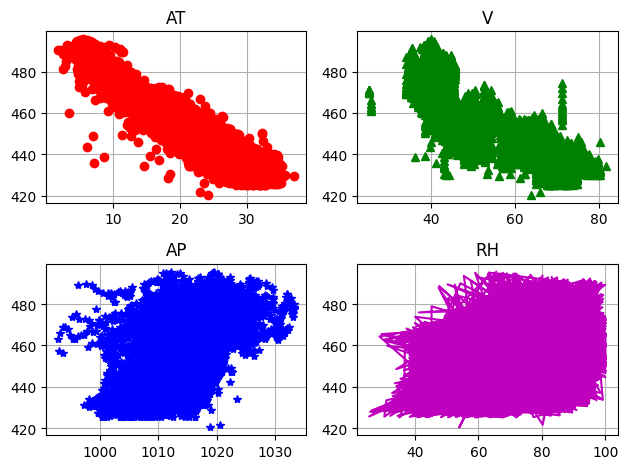

In [6]:
plt.subplot(221)
plt.plot(data['AT'], y, 'ro')
plt.title('AT')
plt.grid()
plt.subplot(222)
plt.plot(data['V'], y, 'g^')
plt.title('V')
plt.grid()
plt.subplot(223)
plt.plot(data['AP'], y, 'b*')
plt.title('AP')
plt.grid()
plt.subplot(224)
plt.plot(data['RH'], y, 'm-')
plt.title('RH')
plt.grid()
plt.tight_layout()
plt.show()

In [7]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=1)
lr = LinearRegression()
model = lr.fit(x_train, y_train)
print(model)
print(lr.coef_)
print(lr.intercept_)

LinearRegression()
[-1.96865472 -0.2392946   0.0568509  -0.15861467]
460.0572726746853


20.837191547220346 4.564777272465804


D:\anaconda3\envs\machinelearning\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


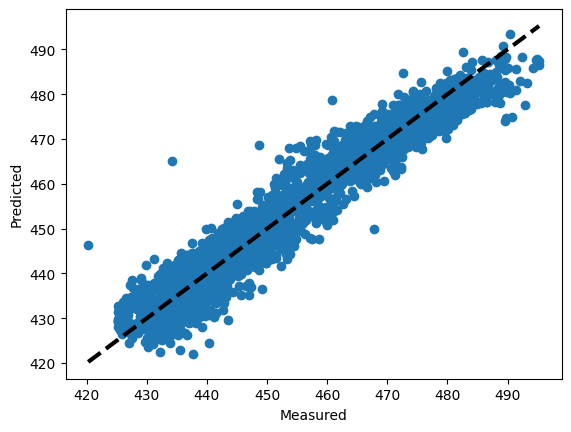

In [8]:
y_hat = lr.predict(np.array(x_test))
mse = np.average((y_hat - np.array(y_test)) ** 2)  # Mean Squared Error
rmse = np.sqrt(mse)  # Root Mean Squared Error
print(mse, rmse)
 
fig, ax = plt.subplots()
ax.scatter(y_test, y_hat)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3)
ax.set_xlabel('Measured')  # 真实值
ax.set_ylabel('Predicted') # 预测值
plt.show()

In [9]:
from sklearn.model_selection import cross_val_predict

y_predicted = cross_val_predict(lr,x,y,cv=10)

MSE： 20.793672509857533
RMSE:  4.560007950635343


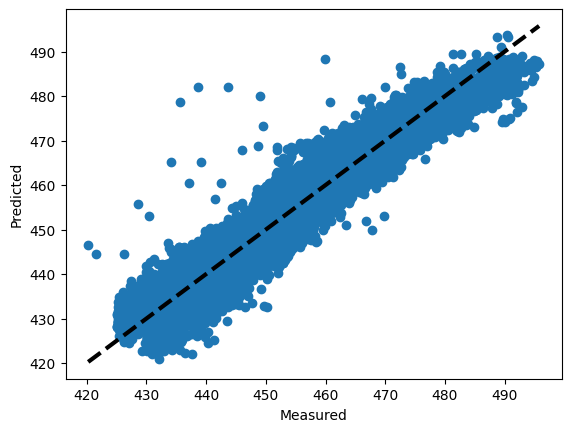

In [10]:
from sklearn import metrics
print("MSE：",metrics.mean_squared_error(y,y_predicted)) 
print("RMSE: ",np.sqrt(metrics.mean_squared_error(y,y_predicted)))

fig, ax = plt.subplots()
ax.scatter(y, y_predicted)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=3)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()